<a href="https://colab.research.google.com/github/ronakraut2004/Analyzing-Google-Play-Store-Data/blob/main/Unveiling_the_Android_App_Market_Analyzing_Google_Play_Store_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load datasets
apps = pd.read_csv('/content/apps.csv')
reviews = pd.read_csv('/content/user_reviews.csv')

# Remove duplicates
apps.drop_duplicates(subset='App', keep='first', inplace=True)

# Drop NA from key columns
apps.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price'], inplace=True)

# Convert Reviews to int
apps['Reviews'] = apps['Reviews'].astype(int)

# Clean Size
def convert_size(size):
    if size == 'Varies with device':
        return None
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return None

apps['Size'] = apps['Size'].astype(str).apply(convert_size)

# Clean Installs
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Clean Price
apps['Price'] = apps['Price'].replace('[\$]', '', regex=True).astype(float)

# Clean Reviews
reviews = reviews.dropna(subset=['Translated_Review', 'Sentiment'])


Category Exploration

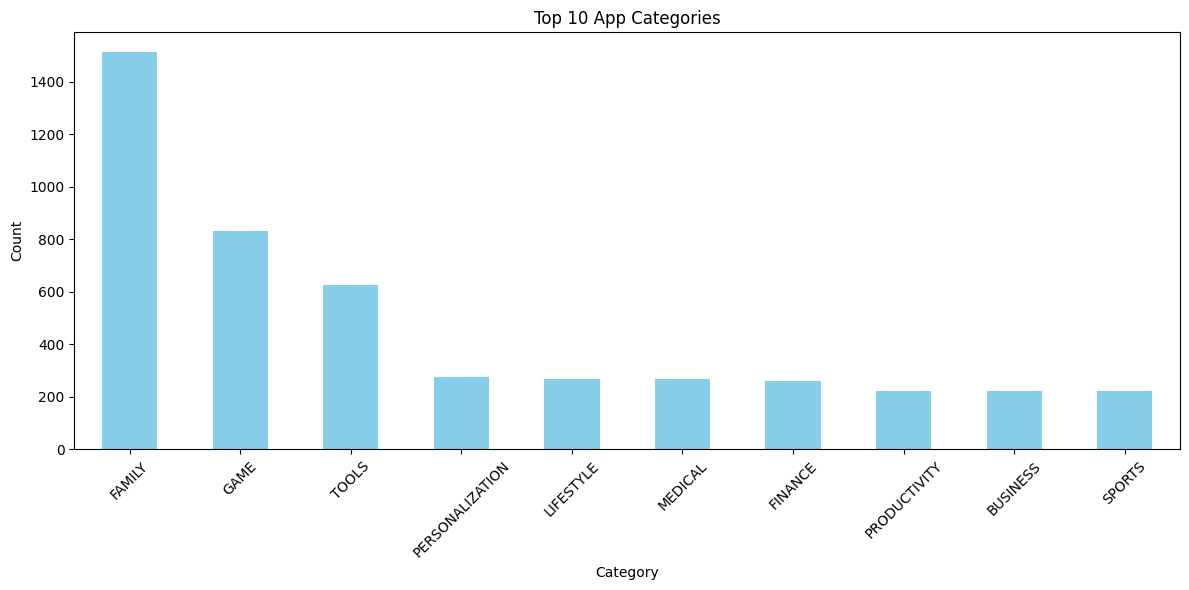

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
apps['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Metrics Analysis: Ratings, Size, Price, Installs

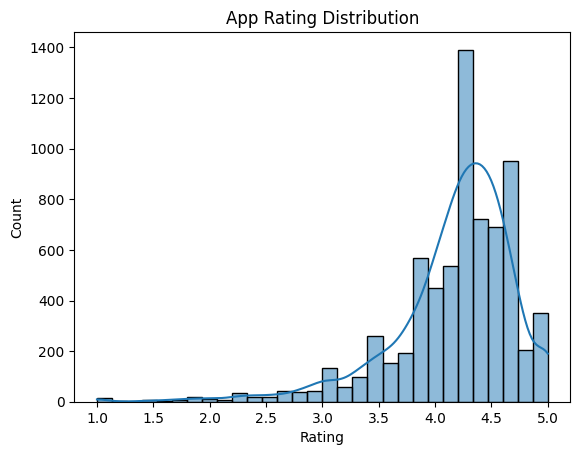

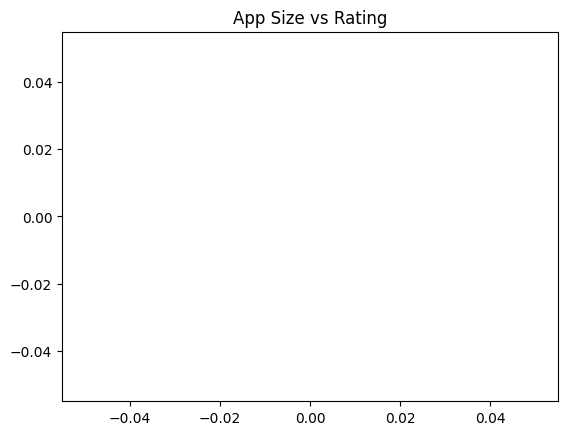

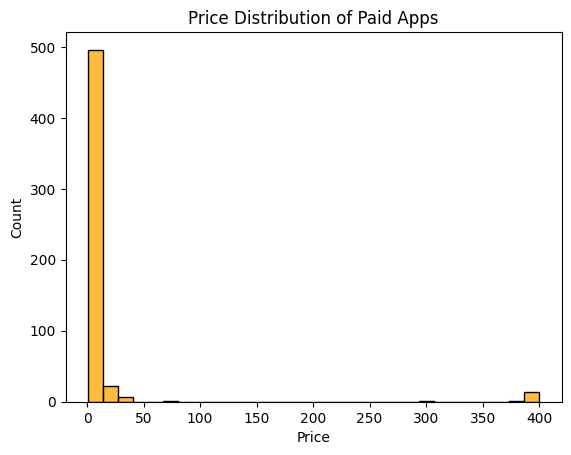

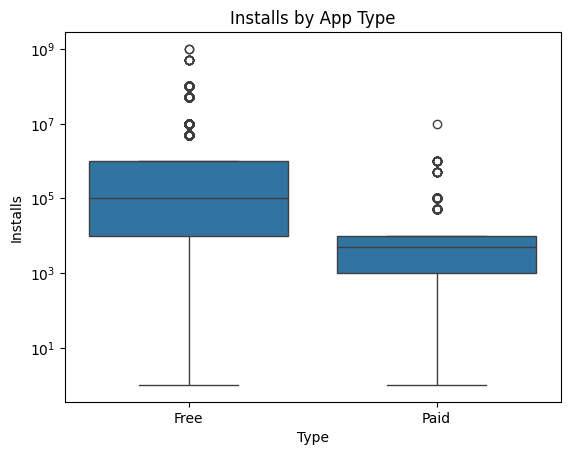

In [3]:
# Ratings Distribution
sns.histplot(apps['Rating'], bins=30, kde=True)
plt.title('App Rating Distribution')
plt.show()

# Size vs Rating
sns.scatterplot(x='Size', y='Rating', data=apps)
plt.title('App Size vs Rating')
plt.show()

# Price Distribution (non-free apps)
sns.histplot(apps[apps['Price'] > 0]['Price'], bins=30, color='orange')
plt.title('Price Distribution of Paid Apps')
plt.show()

# Installs vs Rating
sns.boxplot(x='Type', y='Installs', data=apps)
plt.yscale('log')
plt.title('Installs by App Type')
plt.show()


Sentiment Analysis (User Reviews)

<ipython-input-4-111798350>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='Sentiment', palette='Set2')


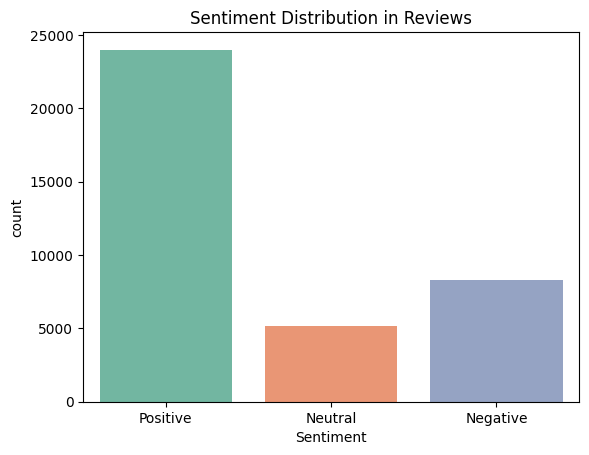

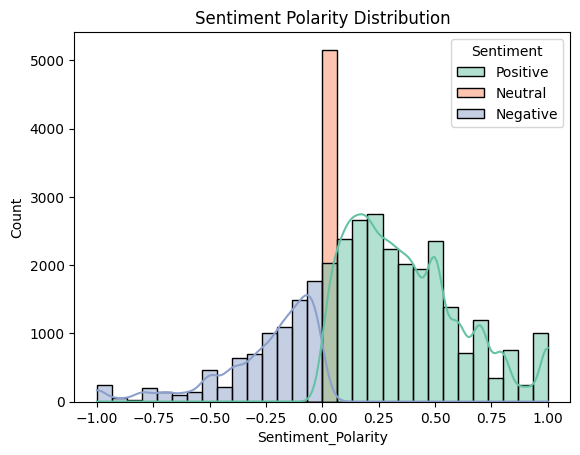

In [4]:
# Sentiment count
sns.countplot(data=reviews, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution in Reviews")
plt.show()

# Sentiment polarity distribution
sns.histplot(data=reviews, x='Sentiment_Polarity', hue='Sentiment', bins=30, kde=True, palette='Set2')
plt.title("Sentiment Polarity Distribution")
plt.show()


In [6]:
import plotly.express as px

# Prepare the category count DataFrame
category_counts = apps['Category'].value_counts().head(10).reset_index()
category_counts.columns = ['Category', 'Count']  # Rename columns to match plotly x and y

# Plot interactive bar chart
fig = px.bar(
    category_counts,
    x='Category',
    y='Count',
    title='Top 10 App Categories (Interactive)',
    labels={'Category': 'App Category', 'Count': 'Number of Apps'},
    color='Count',
    color_continuous_scale='Viridis'
)
fig.show()
